# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv").fillna(0)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,521,555,607
1,0,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446
2,0,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,0,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638
4,0,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19
5,0,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,15,15,15,15,19,19,19,19,21,21
6,0,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142
7,0,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,736,770,822,833,853,881,921,937,967,1013
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,91,93,96,96,96,99,100,103,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,308853,337072,366667,396223,429052,461437,496535,526396,555313,555313
Spain,0,0,0,0,0,0,0,0,0,0,...,126168,131646,136675,141942,148220,153222,158273,163027,166831,166831
Italy,0,0,0,0,0,0,0,0,0,2,...,124632,128948,132547,135586,139422,143626,147577,152271,156363,156363
France,0,0,2,3,3,3,4,5,5,5,...,90848,93773,98963,110065,113959,118781,125931,130727,133670,133670
Germany,0,0,0,0,0,1,4,4,4,5,...,96092,100123,103374,107663,113296,118181,122171,124908,127854,127854
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,42477,48436,52279,55949,61474,65872,74605,79874,85206,85206
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,82543,82602,82665,82718,82809,82883,82941,83014,83134,83134
Iran,0,0,0,0,0,0,0,0,0,0,...,55743,58226,60500,62589,64586,66220,68192,70029,71686,71686
Turkey,0,0,0,0,0,0,0,0,0,0,...,23934,27069,30217,34109,38226,42282,47029,52167,56956,56956


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,10360,11130,12161,14034,16170,18092,19638,20727,22192,22192


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1].astype('int32')

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
4/3/20,2020-04-03,9056
4/4/20,2020-04-04,10360
4/5/20,2020-04-05,11130
4/6/20,2020-04-06,12161
4/7/20,2020-04-07,14034
4/8/20,2020-04-08,16170
4/9/20,2020-04-09,18092
4/10/20,2020-04-10,19638
4/11/20,2020-04-11,20727
4/12/20,2020-04-12,22192


Text(0, 0.5, 'Number of cases')

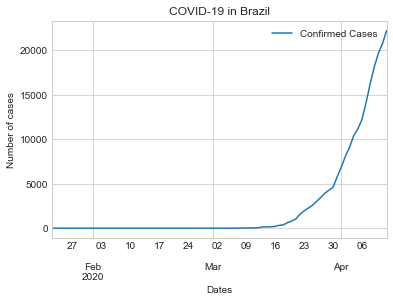

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,124632,128948,132547,135586,139422,143626,147577,152271,156363,156363


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
4/8/20,2020-04-08,139422
4/9/20,2020-04-09,143626
4/10/20,2020-04-10,147577
4/11/20,2020-04-11,152271
4/12/20,2020-04-12,156363


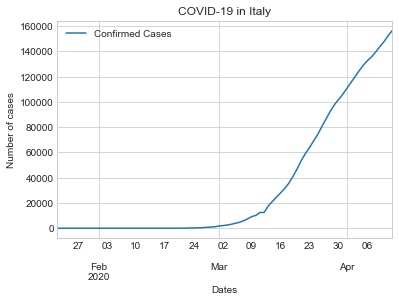

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
US,555313
Spain,166831
Italy,156363
France,133670
Germany,127854
...,...
South Sudan,4
Sao Tome and Principe,4
Timor-Leste,2


### 3.1 Total de casos diários acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,22192


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [13]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([    0,   393,   786,  1179,  1572,  1965,  2357,  2750,  3143,
        3536,  3929,  4322,  4714,  5107,  5499,  5892,  6285,  6678,
        7071,  7464,  7857,  8250,  8642,  9035,  9428,  9821, 10214,
       10607, 11000, 11393, 11786, 12178, 12571, 12964, 13357, 13750,
       14143, 14536, 14929, 15321, 15714, 16107, 16500, 16893, 17286,
       17679, 18072, 18464, 18857, 19250, 19643, 20036, 20429, 20822,
       21215, 21607, 22000, 22393, 22786, 23179, 23572, 23965, 24358,
       24750, 25143, 25536, 25929, 26322, 26715, 27108, 27501, 27894,
       28286, 28679, 29072, 29465, 29858, 30251, 30644, 31037, 31429,
       31822, 32215, 32608, 33001, 33394, 33787, 34180, 34572, 34965,
       35358, 35751, 36144, 36537, 36930, 37323, 37715, 38108, 38501,
       38894, 39287, 39680, 40073, 40466, 40858, 41251, 41644])

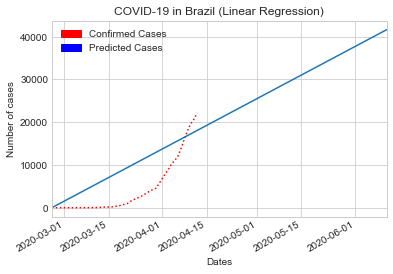

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

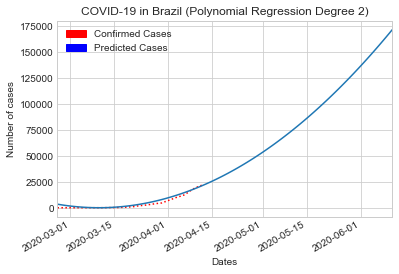

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression Degree 2")

### 4.3 Regressão Polinomial grau 3

In [18]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

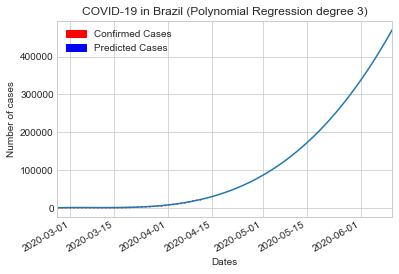

In [19]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression degree 3")

### 4.4 Regressão Polinomial grau 4

In [20]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

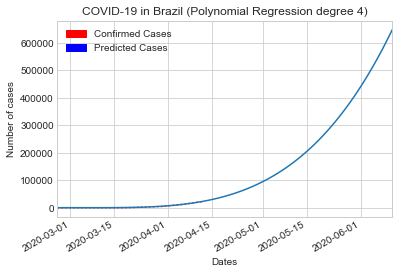

In [21]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Regression degree 4")

### 4.5 Logistic and Exponential Curve

In [22]:
def logistic_model(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

In [23]:
def exponential_model(x, a, b, c):
    return a*np.exp(b*(x-c+10))

In [24]:
import datetime

dfForPlotBrazil = dfForPlot
dfForPlotBrazil = dfForPlotBrazil[dfForPlotBrazil['infected'] > 0]
date_first_infection = dfForPlotBrazil['date'].iloc[0]

dfForPlotBrazil.loc[:,'date'] = dfForPlotBrazil['date'].map(lambda x: (x - date_first_infection).days)
dfForPlotBrazil

c:\users\pichau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,infected
2/26/20,0,1
2/27/20,1,1
2/28/20,2,1
2/29/20,3,2
3/1/20,4,2
3/2/20,5,2
3/3/20,6,2
3/4/20,7,4
3/5/20,8,4
3/6/20,9,13


Infection speed     = 5.733
Total infected      = 37397
40 dias =  2020-04-06 00:00:00


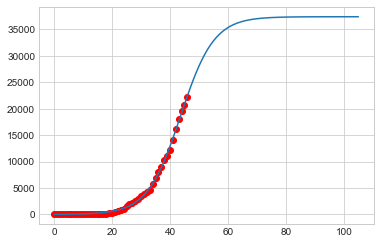

In [25]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(logistic_model, x, y, maxfev=100000)

sol = int(fsolve(lambda x: logistic_model(x, fit[0][0], fit[0][1], fit[0][2]) - int(fit[0][2]), fit[0][1]))
end = date_first_infection + datetime.timedelta(days=sol)

pred_x = list(range(max(x), sol))
y_l=[logistic_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_l, label="Logistic model")

peakday = date_first_infection + datetime.timedelta(days=fit[0][1])
print("Infection speed     = %.3f" % fit[0][0])
print("Total infected      = %.0f" % fit[0][2])
print("40 dias = ", date_first_infection + datetime.timedelta(days=40))

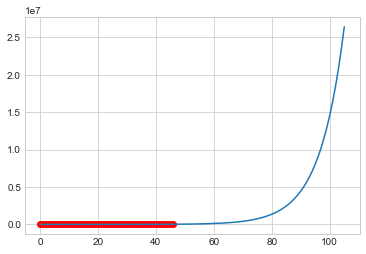

In [26]:
x = list(dfForPlotBrazil.iloc[:, 0])
y = list(dfForPlotBrazil.iloc[:, 1])
fit = curve_fit(exponential_model, x, y)

y_e = [exponential_model(i, fit[0][0], fit[0][1], fit[0][2]) for i in x+pred_x]
plt.scatter(list(dfForPlotBrazil.iloc[:, 0]), list(dfForPlotBrazil.iloc[:, 1]), label="Real data", color="red")
plt.plot(x+pred_x, y_e, label="Exponential model")